In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
#Data preprocessing

In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df['doornumber'] = df['doornumber'].replace({'two': 2, 'four': 4})
df['cylindernumber']=df['cylindernumber'].replace({'four':4,'six':6,'eight':8,'twelve':12,'five':5,'three':3,'two':2})

In [6]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
df = df.drop(columns=['CarName'])
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
df.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
#chhecking is there any missing values
df.isna().sum()

car_ID              0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:

# Perform one-hot encoding
df = pd.get_dummies(df, columns=['fueltype','aspiration','carbody','drivewheel','enginetype','fuelsystem'])
df

,car_ID,symboling,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,2,front,88.6,168.8,64.1,48.8,2548,4,...,False,False,False,False,False,False,False,True,False,False
1,2,3,2,front,88.6,168.8,64.1,48.8,2548,4,...,False,False,False,False,False,False,False,True,False,False
2,3,1,2,front,94.5,171.2,65.5,52.4,2823,6,...,True,False,False,False,False,False,False,True,False,False
3,4,2,4,front,99.8,176.6,66.2,54.3,2337,4,...,False,False,False,False,False,False,False,True,False,False
4,5,2,4,front,99.4,176.6,66.4,54.3,2824,5,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,4,front,109.1,188.8,68.9,55.5,2952,4,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,4,front,109.1,188.8,68.8,55.5,3049,4,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,4,front,109.1,188.8,68.9,55.5,3012,6,...,True,False,False,False,False,False,False,True,False,False
203,204,-1,4,front,109.1,188.8,68.9,55.5,3217,6,...,False,False,False,False,False,True,False,False,False,False


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#  label encoding to the 'symboling' column
df['symboling'] = label_encoder.fit_transform(df['symboling'])

df['doornumber'] = label_encoder.fit_transform(df['doornumber'])

df['cylindernumber'] = label_encoder.fit_transform(df['cylindernumber'])


In [12]:
df[['symboling' ,'doornumber','cylindernumber']]

,symboling,doornumber,cylindernumber
0,5,0,2
1,5,0,2
2,3,0,4
3,4,1,2
4,4,1,3
...,...,...,...
200,1,1,2
201,1,1,2
202,1,1,4
203,1,1,4


In [18]:
df.columns

Index(['car_ID', 'symboling', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [45]:
#x is the independent and y is the dependent variable
x = df[['symboling', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg',  'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']]
y = df['price'] 

In [46]:
# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [47]:
x_train

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
12,2,0,101.2,176.8,64.8,54.3,2710,4,164,3.31,...,False,False,False,False,False,False,False,True,False,False
185,4,1,97.3,171.7,65.5,55.7,2212,2,109,3.19,...,False,False,False,False,False,False,False,True,False,False
48,2,1,113.0,199.6,69.6,52.8,4066,4,258,3.63,...,False,False,False,False,False,False,False,True,False,False
134,5,0,99.1,186.6,66.5,56.1,2707,2,121,2.54,...,False,False,False,False,False,False,False,True,False,False
34,3,0,93.7,150.0,64.0,52.6,1956,2,92,2.91,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,3,0,98.4,175.7,72.3,50.5,3366,5,203,3.94,...,False,False,False,False,False,False,False,True,False,False
124,5,0,95.9,173.2,66.3,50.2,2818,2,156,3.59,...,False,False,False,False,False,False,False,False,True,False
105,5,0,91.3,170.7,67.9,49.7,3139,4,181,3.43,...,True,False,False,False,False,False,False,True,False,False
189,5,0,94.5,159.3,64.2,55.6,2254,2,109,3.19,...,False,False,False,False,False,False,False,True,False,False


In [48]:
x_test

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
2,3,0,94.5,171.2,65.5,52.4,2823,4,152,2.68,...,True,False,False,False,False,False,False,True,False,False
27,3,0,93.7,157.3,63.8,50.6,2191,2,98,3.03,...,False,False,False,False,False,False,False,True,False,False
44,3,0,94.5,155.9,63.6,52.0,1874,2,90,3.03,...,False,False,False,True,False,False,False,False,False,False
31,4,0,86.6,144.6,63.9,50.8,1819,2,92,2.91,...,False,False,True,False,False,False,False,False,False,False
195,1,1,104.3,188.8,67.2,57.5,3034,2,141,3.78,...,False,False,False,False,False,False,False,True,False,False
5,4,0,99.8,177.3,66.3,53.1,2507,3,136,3.19,...,False,False,False,False,False,False,False,True,False,False
94,3,0,94.5,165.3,63.8,54.5,1951,2,97,3.15,...,False,False,False,True,False,False,False,False,False,False
145,2,1,97.0,172.0,65.4,54.3,2510,2,108,3.62,...,False,False,False,False,False,False,False,True,False,False
32,3,0,93.7,150.0,64.0,52.6,1837,2,79,2.91,...,False,False,True,False,False,False,False,False,False,False
150,3,0,95.7,158.7,63.6,54.5,1985,2,92,3.05,...,False,False,False,True,False,False,False,False,False,False


In [49]:
reg=LinearRegression()

In [50]:
reg.fit(x_train,y_train)

LinearRegression()

In [52]:
#making predictions
pred=reg.predict(x_test)
pred

array([10423.96666859, 10620.83882822,  7318.64000769,  7504.34912407,
       16230.79476884, 16775.20814313,  5936.41502901, 13280.91526079,
        5507.14104893,  6713.90068905, 12475.2231374 , 27210.1402263 ,
        3980.83831426,  7205.62623936,  6109.28345198,  8859.18697574,
        7575.05377651, 33490.9926776 , 33936.57110826, 13168.95226992,
       13073.81000449, 21456.08937894, 10415.44073561,  9730.78029286,
        7872.35275288, 10430.47894446,  7406.97579399,  5036.4250448 ,
        6197.14914396, 10042.06111786, 18329.6475883 ,  9584.2430087 ,
       16288.27326998, 22861.51755729,  5619.12915685,  7673.59011288,
        6701.83422963, 13181.93059393,  6554.18297009, 13015.28251845,
       22794.40414794])

In [53]:
reg.coef_

array([ 5.35061006e+02,  7.99162843e+02,  1.07631702e+02, -7.27445190e+01,
        6.56342936e+02,  2.57371832e+02,  2.59566480e+00,  2.92441890e+03,
        1.40021536e+02, -6.35881901e+02, -4.35637988e+03, -1.69929648e+03,
       -8.31039908e+00,  3.45241297e+00,  3.67131827e+01,  1.98897038e+02,
        7.63447263e+03, -7.63447263e+03, -1.00645147e+03,  1.00645147e+03,
        3.01837046e+03,  1.65834423e+02, -7.60784506e+02, -5.74301998e+02,
       -1.84911838e+03, -1.47956424e+03, -8.13201484e+01,  1.56088439e+03,
       -1.89793591e+03, -4.31415754e+03, -2.27665225e+03,  8.20377095e+02,
        1.06629345e+03, -8.88131581e+03,  1.54833910e+04, -3.08084507e+02,
        7.10640560e+01, -1.43600522e+03,  7.63447263e+03, -3.18807729e+03,
        6.75892498e+02, -3.44926216e+03,  0.00000000e+00])

In [60]:
x_test.loc[5]

symboling                  4
doornumber                 0
wheelbase               99.8
carlength              177.3
carwidth                66.3
carheight               53.1
curbweight              2507
cylindernumber             3
enginesize               136
boreratio               3.19
stroke                   3.4
compressionratio         8.5
horsepower               110
peakrpm                 5500
citympg                   19
highwaympg                25
fueltype_diesel        False
fueltype_gas            True
aspiration_std          True
aspiration_turbo       False
carbody_convertible    False
carbody_hardtop        False
carbody_hatchback      False
carbody_sedan           True
carbody_wagon          False
drivewheel_4wd         False
drivewheel_fwd          True
drivewheel_rwd         False
enginetype_dohc        False
enginetype_dohcv       False
enginetype_l           False
enginetype_ohc          True
enginetype_ohcf        False
enginetype_ohcv        False
enginetype_rot

In [61]:
y_test.loc[5]

15250.0

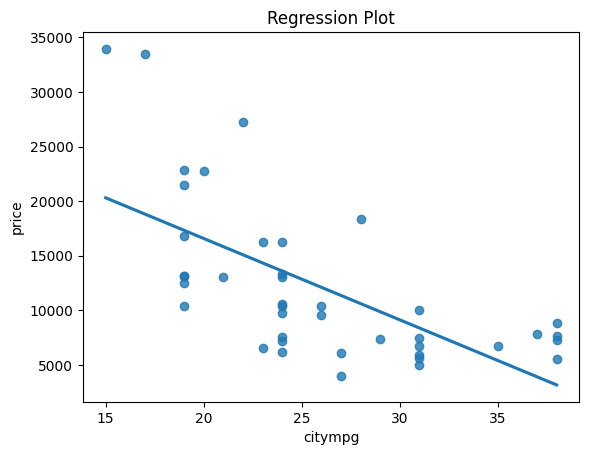

In [73]:

sns.regplot(x=x_test.citympg, y=pred, ci=None)
plt.xlabel('citympg')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()


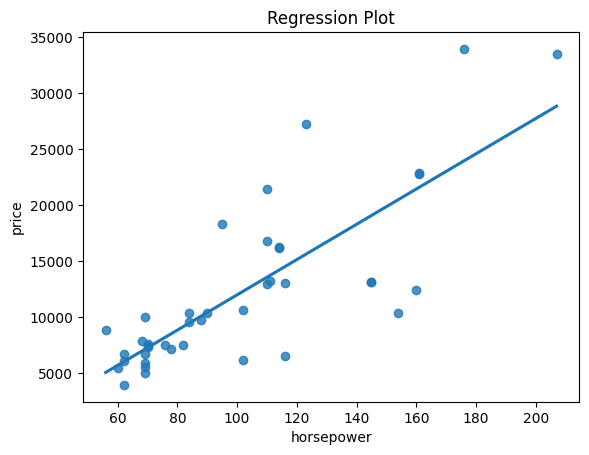

In [74]:
sns.regplot(x=x_test.horsepower, y=pred, ci=None)
plt.xlabel('horsepower')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()


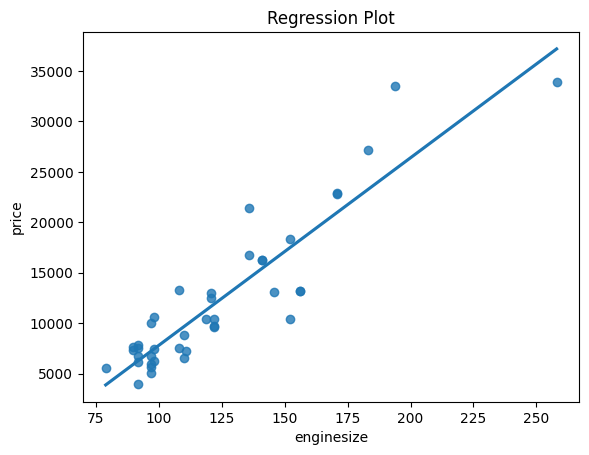

In [77]:
sns.regplot(x=x_test.enginesize, y=pred, ci=None)
plt.xlabel('enginesize')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()


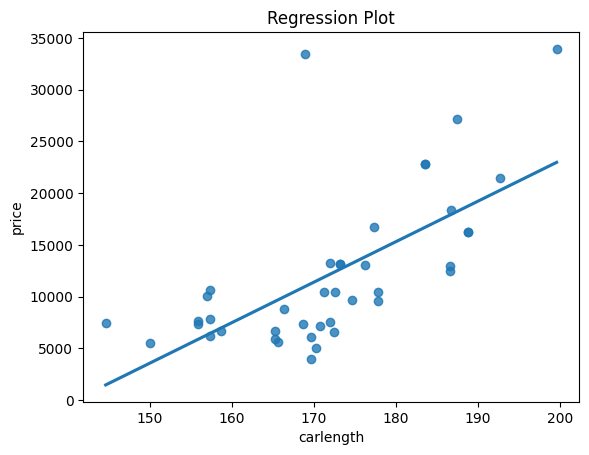

In [78]:
sns.regplot(x=x_test.carlength, y=pred, ci=None)
plt.xlabel('carlength')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()


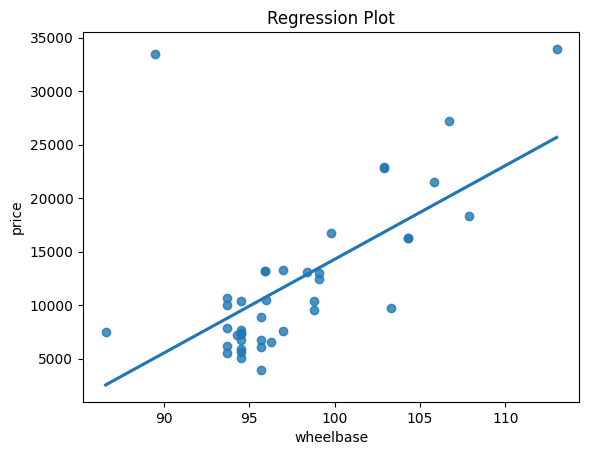

In [79]:
sns.regplot(x=x_test., y=pred, ci=None)
plt.xlabel('wheelbase')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()


In [54]:
reg.intercept_

-59374.227049915076

In [56]:
reg.score(x_test,y_test)

0.8429382246929351

In [91]:
#Evaluation of model
mse=mean_squared_error(y_test,pred)
mse

7519614.386991721

In [58]:
np.sqrt(mse)

2742.191529961341